<a href="https://colab.research.google.com/github/GloriaNdanu25/AI-Coursework2025/blob/main/Mall_Customer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q scikit-learn pandas matplotlib seaborn

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()   # click "Choose Files" and select the CSV you downloaded (e.g., Mall_Customers.csv)
for fn in uploaded.keys():
    print('Uploaded file:', fn)

Saving Mall_Customers.csv to Mall_Customers.csv
Uploaded file: Mall_Customers.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (2).csv


In [ ]:
import pandas as pd
df = pd.read_csv("Mall_Customers (1).csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
!ls

'Mall_Customers (1).csv'   Mall_Customers.csv
'Mall_Customers (2).csv'   sample_data


In [ ]:
df = pd.read_csv("Mall_Customers.csv")

In [ ]:
df = pd.read_csv("Mall_Customers.csv")

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


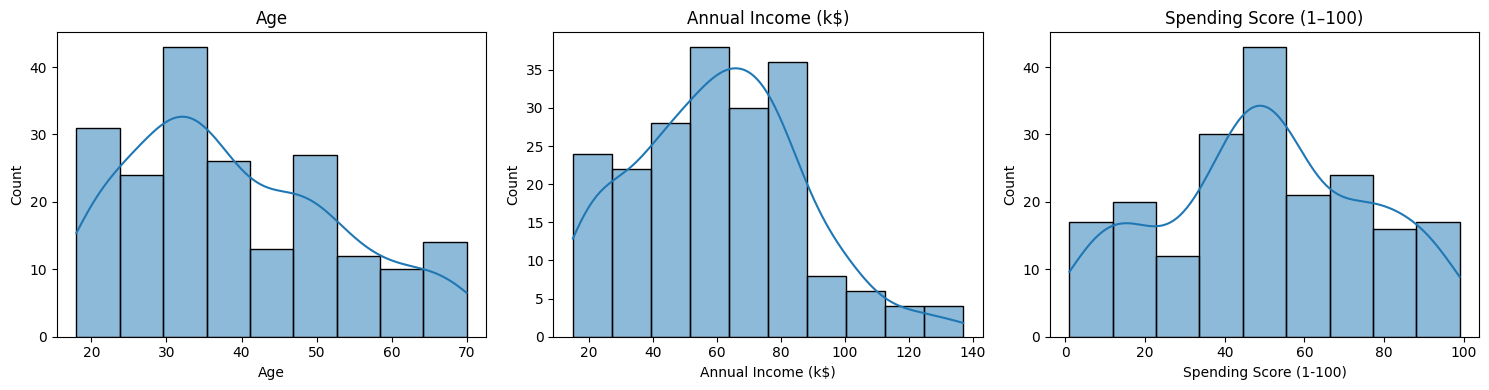

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df['Age'], kde=True, ax=axes[0]).set_title('Age')
sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[1]).set_title('Annual Income (k$)')
sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[2]).set_title('Spending Score (1–100)')
plt.tight_layout()
plt.show()

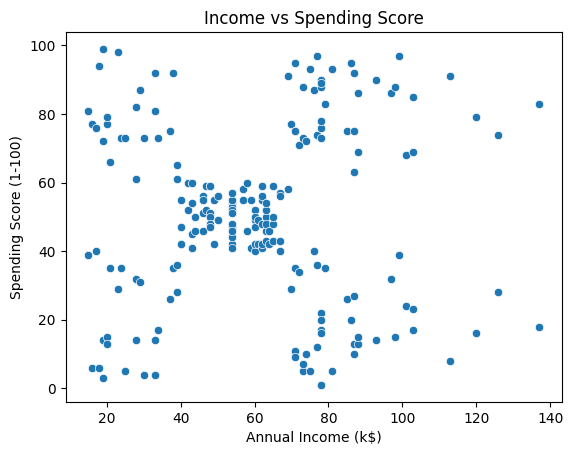

In [ ]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Income vs Spending Score')
plt.show()

In [ ]:
# One feature
X1 = df[['Annual Income (k$)']].values

In [ ]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

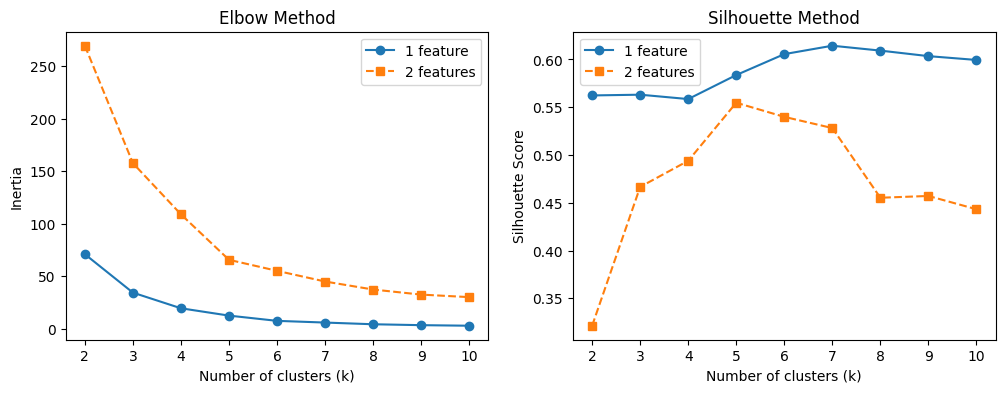

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

def evaluate_kmeans(X, k_range=range(2, 11)):
    inertias = []
    silhouettes = []
    for k in k_range:
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = km.fit_predict(X)
        inertias.append(km.inertia_)
        silhouettes.append(silhouette_score(X, labels))
    return inertias, silhouettes

# Evaluate both
inertias1, silhouettes1 = evaluate_kmeans(X1_scaled)
inertias2, silhouettes2 = evaluate_kmeans(X2_scaled)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(range(2, 11), inertias1, 'o-', label='1 feature')
axes[0].plot(range(2, 11), inertias2, 's--', label='2 features')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].legend()

axes[1].plot(range(2, 11), silhouettes1, 'o-', label='1 feature')
axes[1].plot(range(2, 11), silhouettes2, 's--', label='2 features')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Method')
axes[1].legend()
plt.show()

In [ ]:
k1 = 3   # example best for 1 feature
k2 = 5   # example best for 2 features

kmeans1 = KMeans(n_clusters=k1, random_state=42, n_init=10).fit(X1_scaled)
kmeans2 = KMeans(n_clusters=k2, random_state=42, n_init=10).fit(X2_scaled)

labels1 = kmeans1.labels_
labels2 = kmeans2.labels_

In [ ]:
print(df.groupby('cluster_1feature')['Annual Income (k$)'].mean())
print(df.groupby('cluster_2features')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())

KeyError: 'cluster_1feature'

In [ ]:
# Add cluster labels to the DataFrame
df['cluster_1feature'] = labels1
df['cluster_2features'] = labels2

# Now group by the new cluster columns
print(df.groupby('cluster_1feature')['Annual Income (k$)'].mean())
print(df.groupby('cluster_2features')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())

cluster_1feature
0    33.486486
1    67.088889
2    99.888889
Name: Annual Income (k$), dtype: float64
                   Annual Income (k$)  Spending Score (1-100)
cluster_2features                                            
0                           55.296296               49.518519
1                           86.538462               82.128205
2                           25.727273               79.363636
3                           88.200000               17.114286
4                           26.304348               20.913043


Question 4


In [ ]:
df['cluster_1feature'] = labels1
df['cluster_2features'] = labels2

/tmp/ipython-input-1666770442.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cluster')


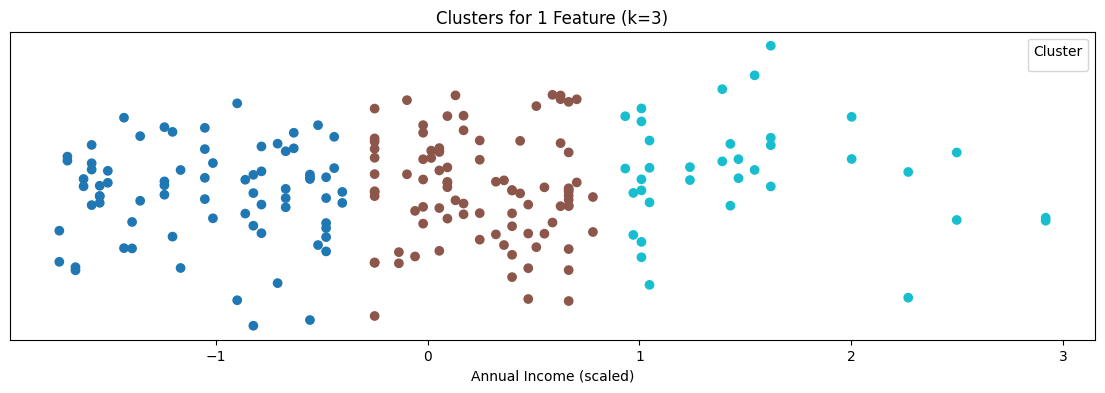

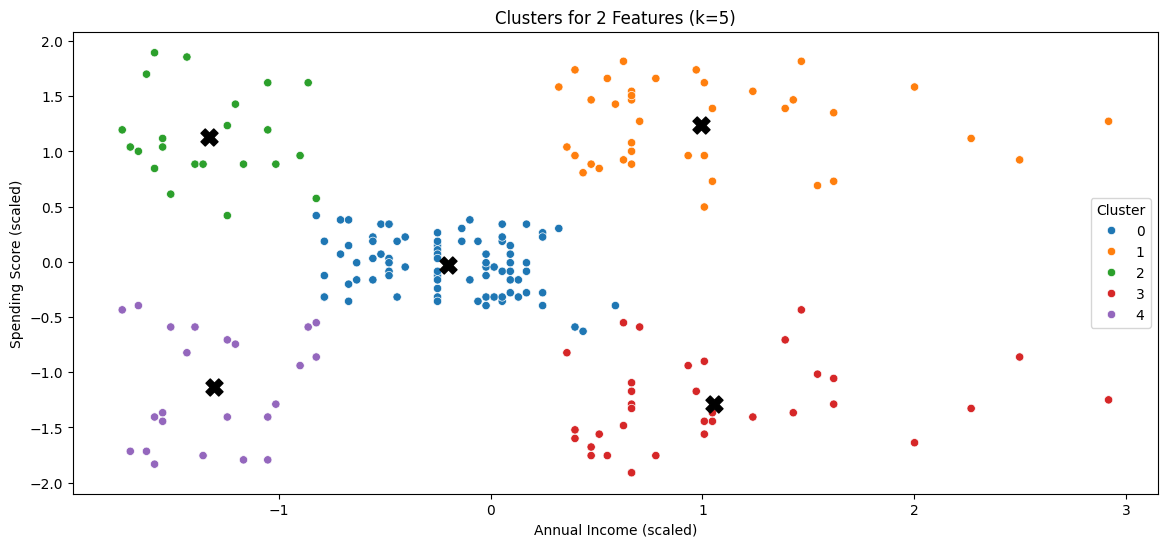

In [ ]:
# Scatter plot for 1 feature
plt.figure(figsize=(14,4))
plt.scatter(X1_scaled[:,0], y=np.random.normal(0,0.02,len(X1_scaled)), c=labels1, cmap='tab10')
plt.yticks([]);
plt.title(f'Clusters for 1 Feature (k={k1})');
plt.xlabel('Annual Income (scaled)')
plt.show()

# 2 features
plt.figure(figsize=(14,6))
sns.scatterplot(x=X2_scaled[:,0], y=X2_scaled[:,1], hue=labels2, palette='tab10')
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='black', s=150, marker='X')
plt.title(f'Clusters for 2 Features (k={k2})')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend(title='Cluster')
plt.show()

The cluster with one feature just shows the distribution of income along the x axis thus does not provide further information besides just the income levels.

The cluster with two features on the other hand shows both the income level and spending habits. This means that you can be able to tell the correlation between income levels and spending habits, leading to better customer understanding and a better marketing strategy.

Question 5: Customer Engagement Recommendations
Using the clustering results from Question 3b, which grouped customers by Annual Income (k$) and Spending Score (1–100), we can identify different types of mall shoppers and propose tailored engagement strategies for each segment.

Cluster 1: Low income, low spending — price-sensitive shoppers who visit occasionally.
Cluster 2: Low income, high spending — loyal customers who often take advantage of promotions.
Cluster 3: High income, low spending — potential high-value customers who are not highly engaged.
Cluster 4: High income, high spending — premium shoppers who contribute the most to mall revenue.
Cluster 5: Middle-income, moderate spending — average shoppers forming the largest segment.

Recommended Engagement Strategies
Cluster 1: Offer discounts, coupons, and affordable product bundles to encourage higher purchases.

Cluster 2: Maintain loyalty through cashback offers, membership points, and regular sales notifications.

Cluster 3: Send targeted invitations to exclusive events or premium brands to spark engagement.

Cluster 4: Provide VIP services, early access to new collections, and personalized experiences.

Cluster 5: Use seasonal promotions and personalized recommendations to retain steady spending.

By applying these targeted strategies, the mall can enhance customer satisfaction, improve marketing efficiency, and boost overall profitability